
# Mobile Phone Price Prediction Model
aims to train a model for predicting mobile phone prices based on various attributes, specifications, and features. The goal is to assist phone manufacturers in market research and provide a price indicator for different phones' cost performance.

## Steps:
1. Data Exploration
2. Feature Selection
3. Data Visualization
4. Data Preprocessing
5. Model Selection
6. Model Training and Evaluation
7. Feature Importance Analysis
8. Conclusion and Recommendations


In [14]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score


In [15]:

# Load the dataset
df = pd.read_csv('../train.csv')
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [16]:
# Basic data exploration
df.info()
df.describe()
# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Dataset Shape: (2000, 21)
Unique values in 'battery_power': 1094
Unique values in 'blue': 2
Unique values in 'clock_speed': 26
Unique values in 'dual_sim': 2
Unique values in 'fc': 20
Unique values in 'four_g': 2
Unique values in 'int_memory': 63
Unique values in 'm_dep': 10
Unique values in 'mobile_wt': 121
Unique values in 'n_cores': 8
Unique values in 'pc': 21
Unique values in 'px_height': 1137
Unique values in 'px_width': 1109
Unique values in 'ram': 1562
Unique values in 'sc_h': 15
Unique values in 'sc_w': 19
Unique values in 'talk_time': 19
Unique values in 'three_g': 2
Unique values in 'touch_screen': 2
Unique values in 'wifi': 2
Unique values in 'price_range': 4


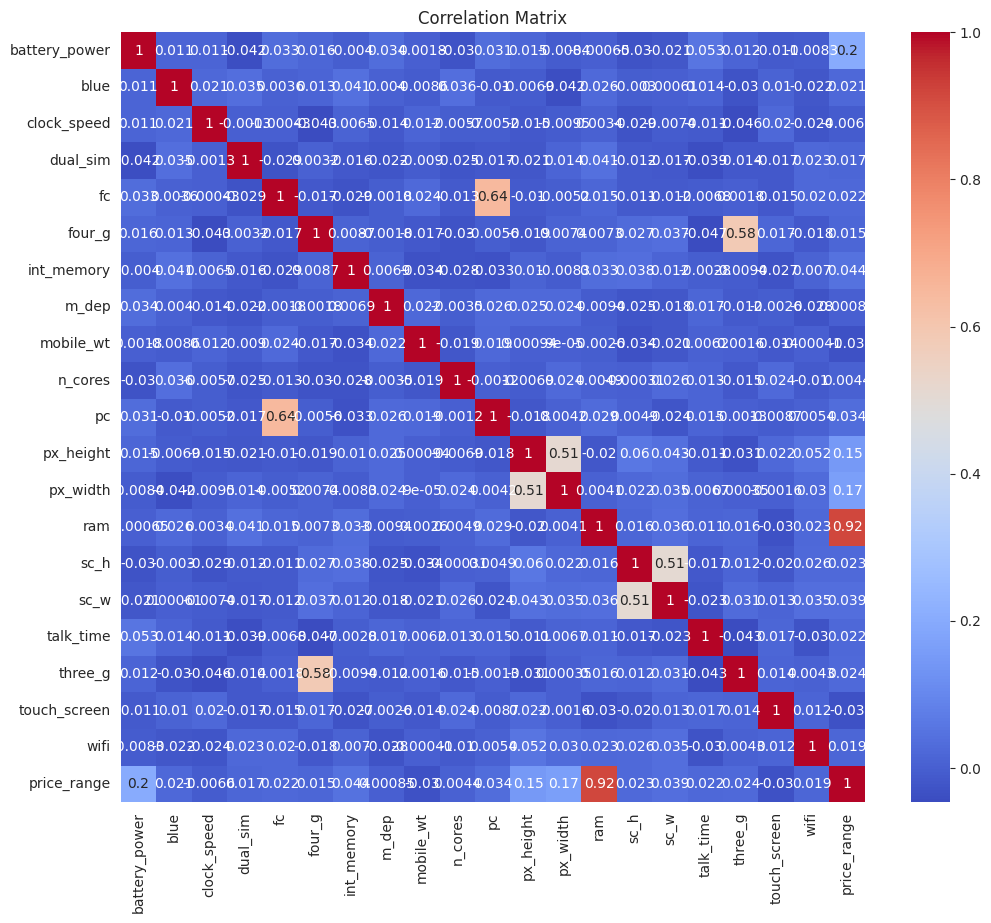

In [17]:
# Detailed data exploration
print("Dataset Shape:", df.shape)
# Display unique values for each column to understand the diversity
for col in df.columns:
    print(f"Unique values in '{col}':", df[col].nunique())
    
# Explore correlations
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



## Feature Selection

Select relevant features that are expected to influence the phone's price.



## Data Visualization

Visualize relationships between features and the target variable.


/home/siwtan/miniconda3/envs/ECS170/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


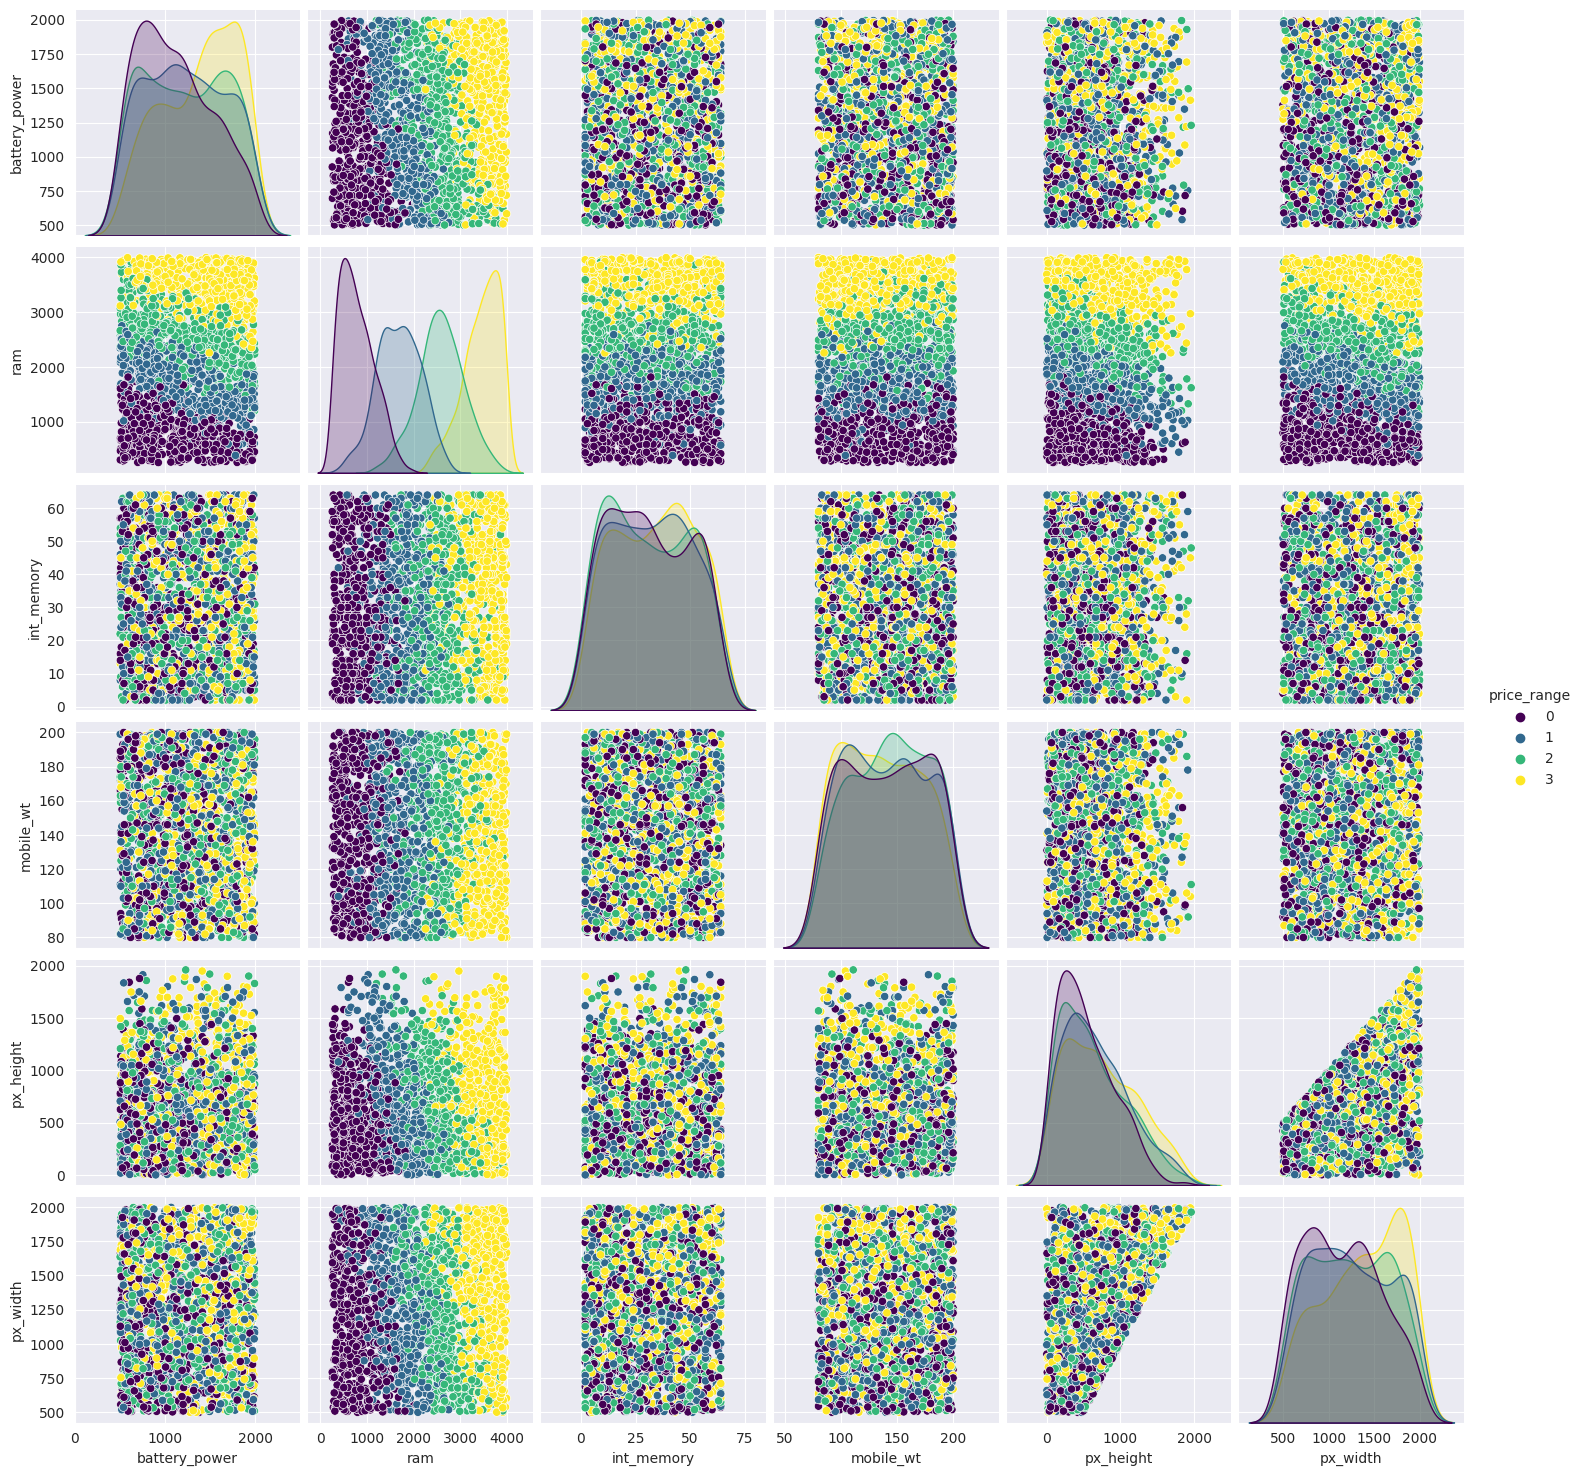

In [18]:

# Pair plot for selected features
selected_features = ['battery_power', 'ram', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'price_range']
sns.pairplot(df[selected_features], hue='price_range', palette='viridis')
plt.show()


In [19]:

# Data Preprocessing

# Since our dataset does not contain any categorical variables that need encoding,
# we will focus on splitting the data and scaling.

# Splitting the dataset into features and target variable
X = df.drop('price_range', axis=1)
y = df['price_range']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## Model Selection

Based on the problem and the data analysis, we will consider the following models:
- Logistic Regression: For classification tasks.
- Linear Regression: For regression tasks (if the target variable is treated as continuous).


In [20]:

# Model Training and Evaluation

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_acc)

# Linear Regression (treating the target as continuous)
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
lin_reg_pred = lin_reg.predict(X_test_scaled)
lin_reg_mse = mean_squared_error(y_test, lin_reg_pred)
lin_reg_r2 = r2_score(y_test, lin_reg_pred)
print("Linear Regression MSE:", lin_reg_mse)
print("Linear Regression R-squared:", lin_reg_r2)


Logistic Regression Accuracy: 0.975
Linear Regression MSE: 0.10469290211930676
Linear Regression R-squared: 0.9215339010437135


In [21]:
# Cross-validation for Logistic Regression
log_reg_cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
print("Logistic Regression CV Scores:", log_reg_cv_scores)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf_cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print("Random Forest CV Scores:", rf_cv_scores)

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb_cv_scores = cross_val_score(gb, X_train_scaled, y_train, cv=5)
print("Gradient Boosting CV Scores:", gb_cv_scores)

Logistic Regression CV Scores: [0.95     0.95     0.946875 0.934375 0.96875 ]
Random Forest CV Scores: [0.890625 0.884375 0.875    0.846875 0.85625 ]
Gradient Boosting CV Scores: [0.884375 0.9125   0.890625 0.8875   0.890625]



## Feature Importance Analysis

In the case of logistic regression, we can analyze the coefficients to understand the influence of each feature.


Feature: battery_power, Score: -2.73567
Feature: blue, Score: -0.03434
Feature: clock_speed, Score: 0.08495
Feature: dual_sim, Score: 0.11816
Feature: fc, Score: -0.04807
Feature: four_g, Score: 0.04341
Feature: int_memory, Score: -0.14751
Feature: m_dep, Score: 0.04754
Feature: mobile_wt, Score: 0.40436
Feature: n_cores, Score: -0.05122
Feature: pc, Score: 0.00473
Feature: px_height, Score: -1.64485
Feature: px_width, Score: -1.51550
Feature: ram, Score: -10.88296
Feature: sc_h, Score: -0.02978
Feature: sc_w, Score: -0.04326
Feature: talk_time, Score: -0.02268
Feature: three_g, Score: -0.06189
Feature: touch_screen, Score: 0.07079
Feature: wifi, Score: 0.10366


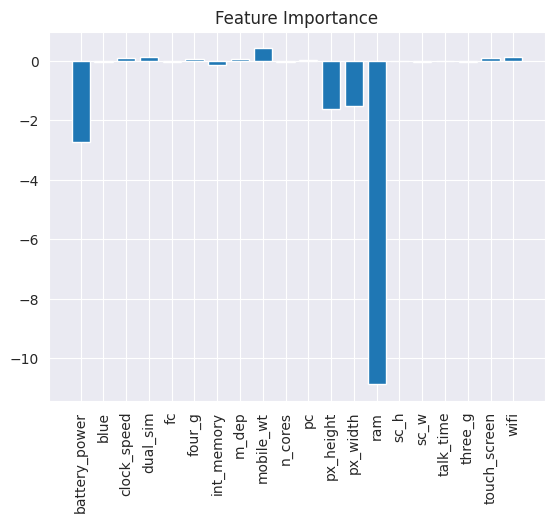

In [22]:
# Extracting coefficients
importance = log_reg.coef_[0]

# Summarize feature importance
for i, v in enumerate(importance):
    print(f'Feature: {X.columns[i]}, Score: {v:.5f}')

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks=np.arange(len(X.columns)), labels=X.columns, rotation=90)
plt.title('Feature Importance')
plt.show()


## Data Preprocessing

Handle missing values, encode categorical variables, and normalize/standardize features.


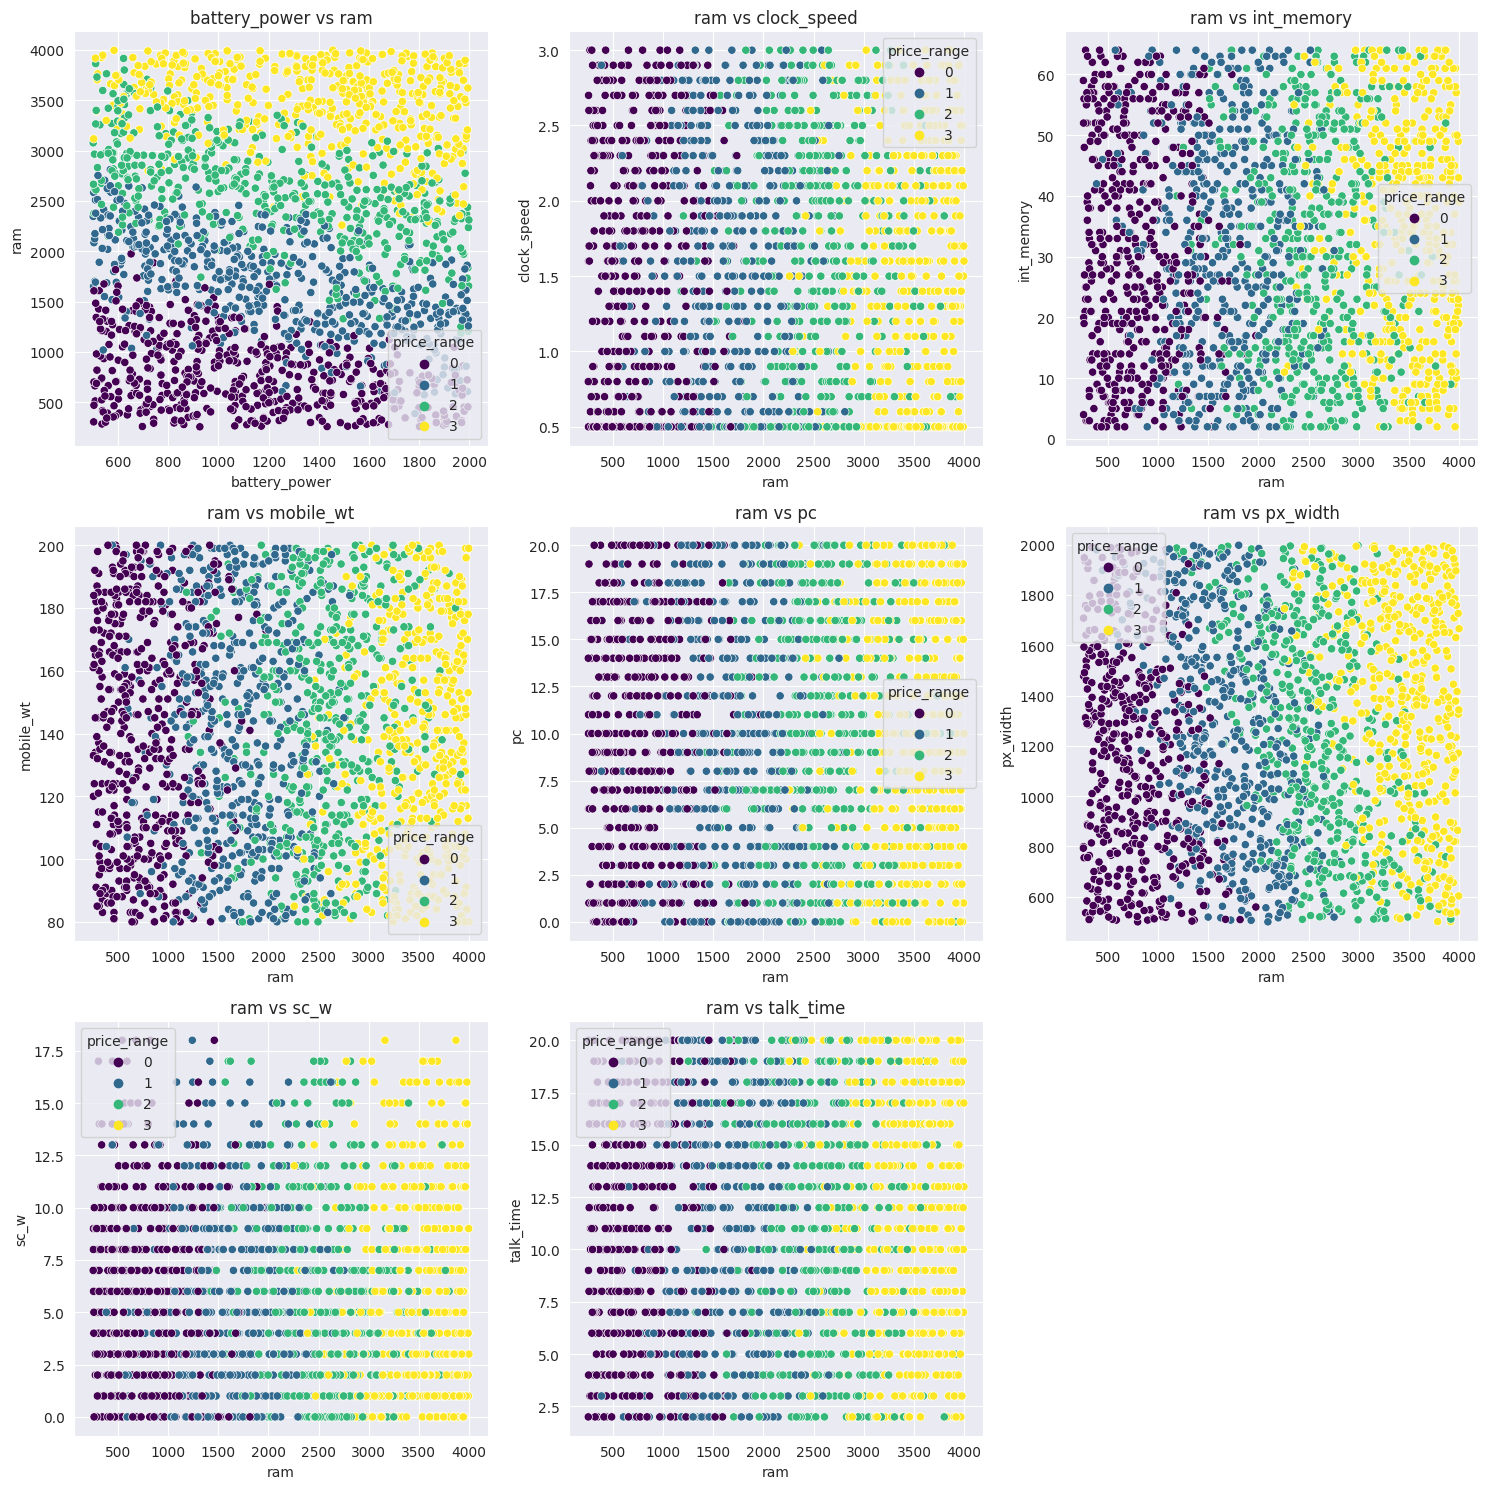

In [24]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../train.csv') 

# Display the first few rows of the dataset to understand its structure
df.head()

import seaborn as sns
import matplotlib.pyplot as plt

# Pairs of attributes for scatter plots as per the notebook
pairs = [
    ('battery_power', 'ram'),
    ('ram', 'clock_speed'),
    ('ram', 'int_memory'),
    ('ram', 'mobile_wt'),
    ('ram', 'pc'),
    ('ram', 'px_width'),
    ('ram', 'sc_w'),
    ('ram', 'talk_time')
]

# Generate scatter plots for the specified pairs
plt.figure(figsize=(15, 15))
for i, pair in enumerate(pairs, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=pair[0], y=pair[1], hue="price_range", palette="viridis")
    plt.title(f'{pair[0]} vs {pair[1]}')

plt.tight_layout()
plt.show()


/home/siwtan/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


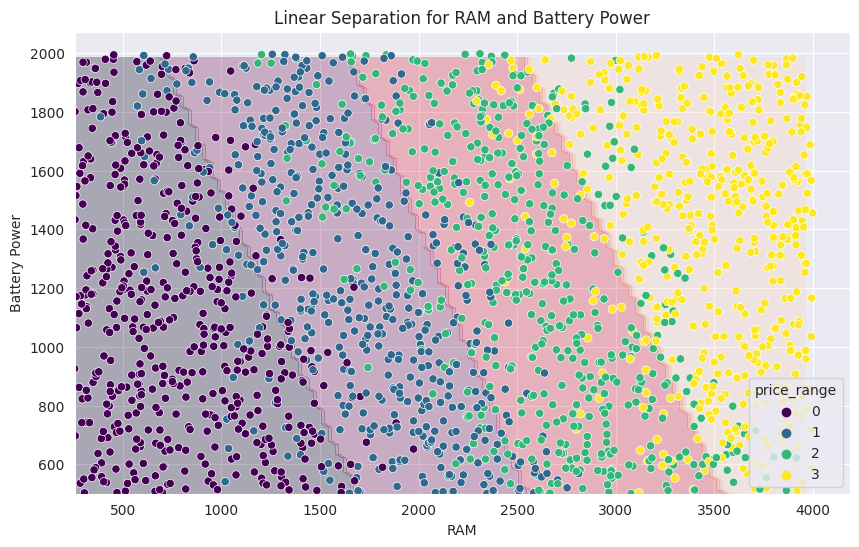

In [25]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Focusing on 'ram' and 'battery_power' for linear separation
features = ['ram', 'battery_power']
X = df[features]
y = df['price_range']

# Create a logistic regression model for linear separation
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Create a mesh to plot the decision boundaries
x_min, x_max = X['ram'].min() - 1, X['ram'].max() + 1
y_min, y_max = X['battery_power'].min() - 1, X['battery_power'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max - x_min) / 100),
                     np.arange(y_min, y_max, (y_max - y_min) / 100))

# Predict over the mesh
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape for the plot
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(data=df, x='ram', y='battery_power', hue="price_range", palette="viridis")
plt.title('Linear Separation for RAM and Battery Power')
plt.xlabel('RAM')
plt.ylabel('Battery Power')
plt.show()



## Model Selection

Choose and justify the selection of machine learning models.


Logistic Regression:
A fundamental classification algorithm well-suited for binary or multi-class classification problems. It's a good starting point due to its simplicity and effectiveness in linearly separable data.

Random Forest Classifier:
An ensemble learning method that operates by constructing a multitude of decision trees. It's effective for classification and provides a good benchmark for performance due to its ability to handle a variety of data types and its robustness against overfitting.

Gradient Boosting Classifier:
Another ensemble technique, which builds trees in a sequential manner where each tree tries to correct the errors of the previous one. It's often more powerful than Random Forest, especially if tuned well, but can be more prone to overfitting and is computationally more intensive.


       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.00000

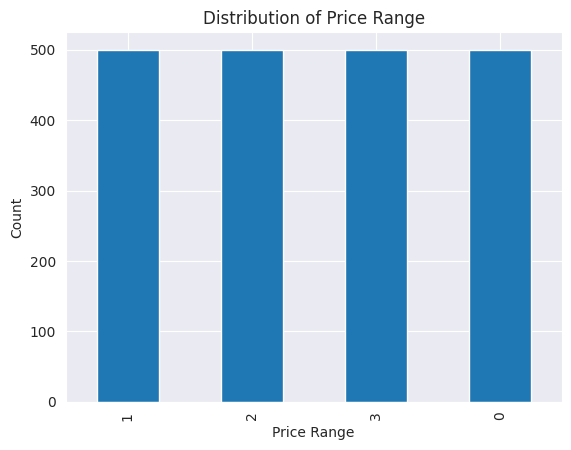

In [26]:
# Basic Statistical Description
print(df.describe())

# Distribution of the target variable
df['price_range'].value_counts().plot(kind='bar')
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()


Logistic Regression Accuracy: 0.975
[[101   4   0   0]
 [  0  91   0   0]
 [  0   2  87   3]
 [  0   0   1 111]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.94      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400


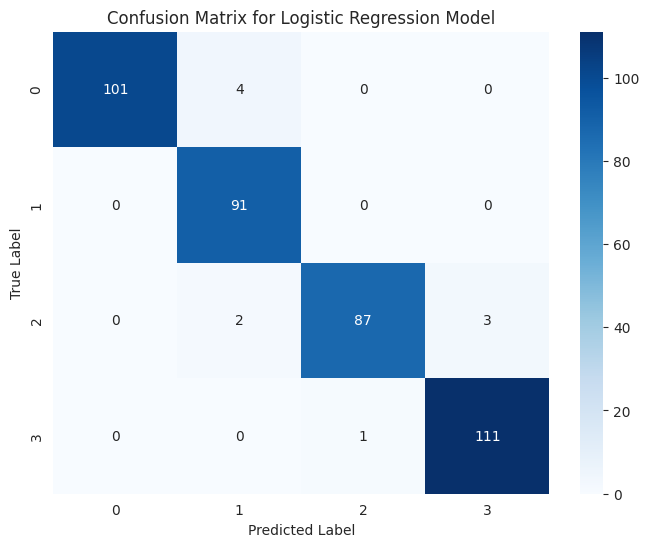

Random Forest Accuracy: 0.8775
[[101   4   0   0]
 [  7  75   9   0]
 [  0   6  77   9]
 [  0   0  14  98]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.88      0.82      0.85        91
           2       0.77      0.84      0.80        92
           3       0.92      0.88      0.89       112

    accuracy                           0.88       400
   macro avg       0.88      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400
Gradient Boosting Accuracy: 0.905
[[101   4   0   0]
 [  4  82   5   0]
 [  0   6  79   7]
 [  0   0  12 100]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.89      0.90      0.90        91
           2       0.82      0.86      0.84        92
           3       0.93      0.89      0.91       112

    accuracy                           0.91       400
   macro avg       0.

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))
print(confusion_matrix(y_test, log_reg_pred))
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, log_reg_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train)
gb_pred = gb.predict(X_test_scaled)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print(confusion_matrix(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
lin_reg_pred = lin_reg.predict(X_test_scaled)
print("Linear Regression MSE:", mean_squared_error(y_test, lin_reg_pred))
print("Linear Regression R-squared:", r2_score(y_test, lin_reg_pred))



## Model Training and Evaluation

Train the model and evaluate its performance.


In [ ]:

# Model Tuning with Grid Search

from sklearn.model_selection import GridSearchCV

#Grid Search for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 6, 8],
    'criterion' :['gini', 'entropy']
}

rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
rf_grid.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best Parameters:", rf_grid.best_params_)
print("Best Score:", rf_grid.best_score_)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier

# Splitting the dataset
X = df.drop('price_range', axis=1)
y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print('Linear Regression RMSE:', mean_squared_error(y_test, y_pred_lr, squared=False))
print('Linear Regression R-squared:', r2_score(y_test, y_pred_lr))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, log_reg_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



## Conclusion and Recommendations

Summarize findings and provide actionable recommendations for phone manufacturers.


In [ ]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()